# Prompts

In [1]:
from langchain_core.prompts import PromptTemplate

PROMPT_1 = PromptTemplate.from_template("What is the capital of {country} ?")
PROMPT_1.invoke('India')

StringPromptValue(text='What is the capital of India ?')

Method 2. Creating a PromptTemplate object and a prompt all at once

In [2]:
# Define template
template = "What is the capital of {country}?"

# Create a prompt template with `PromptTemplate` object
prompt = PromptTemplate(
    template=template,
    input_variables=["country"],
)
prompt

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='What is the capital of {country}?')

Using partial_variables , you can partially apply functions. This is particularly useful when there are common variables to be shared

In [3]:
# Define template
template = "What are the capitals of {country1} and {country2}, respectively?"

# Create a prompt template with `PromptTemplate` object
prompt = PromptTemplate(
    template=template,
    input_variables=["country1"],
    partial_variables={
        "country2": "United States of America"  # Pass `partial_variables` in dictionary form
    },
)
prompt

PromptTemplate(input_variables=['country1'], input_types={}, partial_variables={'country2': 'United States of America'}, template='What are the capitals of {country1} and {country2}, respectively?')

In [4]:
prompt.format(country1="South Korea")

'What are the capitals of South Korea and United States of America, respectively?'

In [5]:
from datetime import datetime

# Define function to return the current date
def get_today():
    return datetime.now().strftime("%B %d")
    
prompt = PromptTemplate(
    template="Today's date is {today}. Please list {n} celebrities whose birthday is today. Please specify their date of birth.",
    input_variables=["n"],
    partial_variables={
        "today": get_today  # Pass `partial_variables` in dictionary form
    },
)


In [6]:
# Create prompt
prompt.format(n=3)

"Today's date is February 28. Please list 3 celebrities whose birthday is today. Please specify their date of birth."

### ChatPromptTemplate
    ChatPromptTemplate can be used to include a conversation history as a prompt.
    
    Messages are structured as tuples in the format (role , message ) and are created as a list.
    
    role
    
    system : A system setup message, typically used for global settings-related prompts.
    human : A user input message.
    ai : An AI response message.

In [7]:
from langchain_core.prompts import ChatPromptTemplate

chat_prompt = ChatPromptTemplate.from_template("What is the capital of {country}?")
chat_prompt.format(country="United States of America")

'Human: What is the capital of United States of America?'

In [8]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        # role, message
        ("system", "You are a friendly AI assistant. Your name is {name}."),
        ("human", "Nice to meet you!"),
        ("ai", "Hello! How can I assist you?"),
        ("human", "{user_input}"),
    ]
)

# Create chat messages
messages = chat_template.format_messages(name="Teddy", user_input="What is your name?")
messages

[SystemMessage(content='You are a friendly AI assistant. Your name is Teddy.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Nice to meet you!', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='What is your name?', additional_kwargs={}, response_metadata={})]

### MessagePlaceholder

    LangChain also provides a MessagePlaceholder , which provides complete control over rendering messages during formatting.
    This can be useful if you’re unsure which roles to use in a message prompt template or if you want to insert a list of messages during formatting.

In [9]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

chat_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a summarization specialist AI assistant. Your mission is to summarize conversations using key points.",
        ),
        MessagesPlaceholder(variable_name="conversation"),
        ("human", "Summarize the conversation so far in {word_count} words."),
    ]
)
chat_prompt

ChatPromptTemplate(input_variables=['conversation', 'word_count'], input_types={'conversation': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annota

In [10]:
formatted_chat_prompt = chat_prompt.format(
    word_count=5,
    conversation=[
        ("human", "Hello! I’m Teddy. Nice to meet you."),
        ("ai", "Nice to meet you! I look forward to working with you."),
    ],
)

print(formatted_chat_prompt)

System: You are a summarization specialist AI assistant. Your mission is to summarize conversations using key points.
Human: Hello! I’m Teddy. Nice to meet you.
AI: Nice to meet you! I look forward to working with you.
Human: Summarize the conversation so far in 5 words.


# Output Parsers

### PydanticOutputParser 
    The PydanticOutputParser is a class that helps transform the output of a language model into structured information. 
    This class can provide the information you need in a clear and organized form instead of a simple text response.

In [54]:
from langchain_groq.chat_models import ChatGroq
from langchain_core.messages import AIMessageChunk
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv
import os

load_dotenv(override=True)


LLM = ChatGroq(name='qwen-2.5-coder-32b', api_key=os.environ.get('GROQ_API_KEY'), temperature=0)

In [12]:
email_conversation = """
From: John (John@bikecorporation.me)
To: Kim (Kim@teddyinternational.me)
Subject: “ZENESIS” bike distribution cooperation and meeting schedule proposal
Dear Mr. Kim,

I am John, Senior Executive Director at Bike Corporation. I recently learned about your new bicycle model, "ZENESIS," through your press release. Bike Corporation is a company that leads innovation and quality in the field of bicycle manufacturing and distribution, with long-time experience and expertise in this field.

We would like to request a detailed brochure for the ZENESIS model. In particular, we need information on technical specifications, battery performance, and design aspects. This information will help us further refine our proposed distribution strategy and marketing plan.

Additionally, to discuss the possibilities for collaboration in more detail, I propose a meeting next Tuesday, January 15th, at 10:00 AM. Would it be possible to meet at your office to have this discussion?

Thank you.

Best regards,
John
Senior Executive Director
Bike Corporation
"""

In [13]:
prompt = PromptTemplate.from_template('''Please extract the information provided in the following email. \n\n {email} ''')
chain = prompt | LLM | StrOutputParser()
answer = chain.stream({'email':email_conversation})

In [14]:
def stream_response(response, return_output=False):
    answer = ''
    for token in response:
        if isinstance(token , AIMessageChunk):
            answer+= token.content + '\n'
            print(token.content, end="", flush=True)
        elif isinstance(token, str):
            answer += token
            print(token, end="", flush=True)
    if return_output:
        return answer
    

In [15]:
output = stream_response(answer, return_output=True)

* Sender: John, Senior Executive Director at Bike Corporation (John@bikecorporation.me)
* Recipient: Kim at Teddy International (Kim@teddyinternational.me)
* Subject: "ZENESIS" bike distribution cooperation and meeting schedule proposal
* Bike Corporation is interested in the "ZENESIS" bicycle model from Teddy International.
* John has requested a detailed brochure for the ZENESIS model, including technical specifications, battery performance, and design aspects.
* The requested information will help Bike Corporation refine their distribution strategy and marketing plan for the ZENESIS model.
* John has proposed a meeting on Tuesday, January 15th, at 10:00 AM to discuss collaboration possibilities in detail.
* John has suggested that the meeting take place at Teddy International's office.

In [16]:
from pydantic import BaseModel, Field
from langchain_core.output_parsers import PydanticOutputParser
class EmailExtract(BaseModel):
    ''' Schema Class for Extracting Usefull information from provided email'''
    person: str = Field(description="The sender of the email")
    email: str = Field(description="The email address of the sender")
    subject: str = Field(description="The subject of the email")
    summary: str = Field(description="A summary of the email content")
    date: str = Field(description="The meeting date and time mentioned in the email content")

email_parser = PydanticOutputParser(pydantic_object=EmailExtract)
chain_pydantic = prompt | LLM | email_parser
answer_pydantic = chain_pydantic.stream({
        "email_conversation": email_conversation,
        "question": "Extract the main content of the email.",
    })

In [17]:
print(email_parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"description": "Schema Class for Extracting Usefull information from provided email", "properties": {"person": {"description": "The sender of the email", "title": "Person", "type": "string"}, "email": {"description": "The email address of the sender", "title": "Email", "type": "string"}, "subject": {"description": "The subject of the email", "title": "Subject", "type": "string"}, "summary": {"description": "A summary of the email content", "title": "Summary", "type": "string"}, "date": {"description": "The meeting date and time mentioned in t

In [18]:
prompt = PromptTemplate.from_template(
    """
You are a helpful assistant. 

QUESTION:
{question}

EMAIL CONVERSATION:
{email_conversation}

FORMAT:
{format}
"""
)


# Add partial formatting of PydanticOutputParser to format
prompt = prompt.partial(format=email_parser.get_format_instructions())

In [19]:
chain = prompt | LLM

In [20]:
# Execute the chain and print the result.
response = chain.stream(
    {
        "email_conversation": email_conversation,
        "question": "Extract the main content of the email.",
    }
)

# The result is provided in JSON format.
output = stream_response(response, return_output=True)

Here is the JSON instance based on the provided email:

```json
{
  "person": "John",
  "email": "John@bikecorporation.me",
  "subject": "ZENESIS bike distribution cooperation and meeting schedule proposal",
  "summary": "John, Senior Executive Director at Bike Corporation, is interested in the new bicycle model 'ZENESIS' from Teddy International. He requests a detailed brochure with technical specifications, battery performance, and design aspects to refine the distribution strategy and marketing plan. He proposes a meeting on January 15th at 10:00 AM at Teddy International's office.",
  "date": "January 15th, 10:00 AM"
}
```

In [21]:
structured_output = email_parser.parse(output)
print(structured_output)

OutputParserException: Invalid json output: Here
 is
 the
 JSON
 instance
 based
 on
 the
 provided
 email
:




``
`
json


{


 
 "
person
":
 "
John
",


 
 "
email
":
 "
John
@
b
ike
cor
por
ation
.
me
",


 
 "
subject
":
 "
Z
EN
ES
IS
 bike
 distribution
 cooperation
 and
 meeting
 schedule
 proposal
",


 
 "
summary
":
 "
John
,
 Senior
 Executive
 Director
 at
 B
ike
 Corporation
,
 is
 interested
 in
 the
 new
 bicy
cle
 model
 '
Z
EN
ES
IS
'
 from
 Ted
dy
 International
.
 He
 requests
 a
 detailed
 bro
ch
ure
 with
 technical
 specific
ations
,
 battery
 performance
,
 and
 design
 aspects
 to
 ref
ine
 the
 distribution
 strategy
 and
 marketing
 plan
.
 He
 propos
es
 a
 meeting
 on
 January
 
1
5
th
 at
 
1
0
:
0
0
 AM
 at
 Ted
dy
 International
'
s
 office
.",


 
 "
date
":
 "
Jan
uary
 
1
5
th
,
 
1
0
:
0
0
 AM
"


}


``
`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [ ]:
output_pydantic = stream_response(answer_pydantic, return_output=True)

#### One thing to note is that the .with_structured_output() function does not support the stream() function.

In [ ]:
llm_with_structured = LLM.with_structured_output(EmailExtract)
answer = llm_with_structured.invoke(email_conversation)
answer

### CommaSeparatedListOutputParser 

    The CommaSeparatedListOutputParser is a specialized output parser in LangChain designed for generating structured outputs in the form of comma-separated lists.
    
    It simplifies the process of extracting and presenting data in a clear and concise list format, 
    making it particularly useful for organizing information such as data points, names, items, or other structured values. 
    By leveraging this parser, users can enhance data clarity, ensure consistent formatting, and improve workflow efficiency, especially in applications where structured outputs are essential.

In [ ]:
from langchain_core.output_parsers import CommaSeparatedListOutputParser
format_intructions = CommaSeparatedListOutputParser().get_format_instructions()
format_intructions

In [ ]:
prompt_cs = PromptTemplate(template="List 7 {subject}. \n\n {{format_instructions}}",
                           input_variables=['subject'],
                           partial_variables={'format_instructions' : format_intructions})

prompt_cs.invoke({'subject' : 'famous Things to explore in Delhi'})

In [ ]:
prompt_cs

In [ ]:
chain_cs = prompt_cs | LLM | CommaSeparatedListOutputParser()
output_cs = chain_cs.invoke({'subject' : 'famous places names to explore in Delhi'})
output_cs

In [ ]:
output_cs[2]

### StructuredOutputParser
    Valuable tool for formatting Large Language Model (LLM) responses into dictionary structures, enabling the return of multiple fields as key/value pairs. 
    While Pydantic and JSON parsers offer robust capabilities, the StructuredOutputParser is particularly effective for less powerful models, such as local models with fewer parameters

In [ ]:
from langchain.output_parsers import ResponseSchema, StructuredOutputParser
response_schema = [ ResponseSchema(name = "answer", description = "Answer for the User's Query"),
                   ResponseSchema(name = "source", description = "source from which the answer is inspired or collected from, it should be a Website URL")]

parser_ = StructuredOutputParser.from_response_schemas(response_schemas=response_schema)



In [ ]:
format_instruction = parser_.get_format_instructions()

In [ ]:
prompt_ = PromptTemplate(template='Answer the users query with the best answer possible. \n\n {query} \n\n {format_ins}',
                        input_variables=['query'],
                        partial_variables={'format_ins' : format_instruction})

In [ ]:
prompt_

In [ ]:
chain_ = prompt_ | LLM | parser_
chain_.invoke({"query":"What is the GDP of India?"})

### JsonOutputParser

    JsonOutputParser is a tool that allows users to specify the desired JSON schema. 
    It is designed to enable an LLM(Large Language Model) to query data and return results in JSON format that adheres to the specified schema. 
    To ensure that the LLM processes data accurately and efficiently, generating JSON in the desired format, the model must have sufficient capacity (e.g., intelligence).

In [22]:
#with pydantic
from pydantic import BaseModel, Field
class Topic(BaseModel):
    description: str = Field(description="A concise description of the topic")
    hashtags: str = Field(description="Keywords in hashtag format (at least 2)")

In [24]:
from langchain_core.output_parsers import JsonOutputParser
question = "Please explain the severity of global warming."
json_parser = JsonOutputParser(pydantic_object=Topic)
json_parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"description": {"description": "A concise description of the topic", "title": "Description", "type": "string"}, "hashtags": {"description": "Keywords in hashtag format (at least 2)", "title": "Hashtags", "type": "string"}}, "required": ["description", "hashtags"]}\n```'

In [30]:
from langchain_core.prompts import ChatPromptTemplate
chat_prompt = ChatPromptTemplate.from_messages([("system" ,"You are a helpfull assistant that do its best to answer the user query"),
                                               ("user", "Format Instructions {format_ins} \n\n User Query {query}")])
chat_prompt = chat_prompt.partial(format_ins = json_parser.get_format_instructions())
chat_prompt.invoke({"query":question})

ChatPromptValue(messages=[SystemMessage(content='You are a helpfull assistant that do its best to answer the user query', additional_kwargs={}, response_metadata={}), HumanMessage(content='Format Instructions The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"description": {"description": "A concise description of the topic", "title": "Description", "type": "string"}, "hashtags": {"description": "Keywords in hashtag format (at least 2)", "title": "Hashtags", "type": "string"}}, "required": ["description", "hashtags"]}\n``` \n\n User Query Please explain the severity of 

In [32]:
chain = chat_prompt | LLM| json_parser

# Run the chain with your question
answer = chain.invoke({"query": question})

In [35]:
answer

dict_keys(['description', 'hashtags'])

In [37]:
#without pydandict
LLM_struct = LLM.with_structured_output(JsonOutputParser)
chain = chat_prompt | LLM | JsonOutputParser()

# Run the chain with your question
answer = chain.invoke({"query": question})
answer

{'description': "Global warming is a long-term increase in Earth's average temperature due to human activities, primarily the burning of fossil fuels like coal, oil, and gas. This process releases large amounts of greenhouse gases, such as carbon dioxide and methane, into the atmosphere, trapping heat and leading to a rise in global temperatures.",
 'hashtags': '#globalwarming #climatechange #greenhousegases #fossilfuels'}

## DateTimeOutputParser
    Generates structured outputs in the form of datetime objects.
    By converting the outputs of LLMs into datetime objects, it enables more systematic and consistent processing of date and time data, making it useful for data processing and analysis.
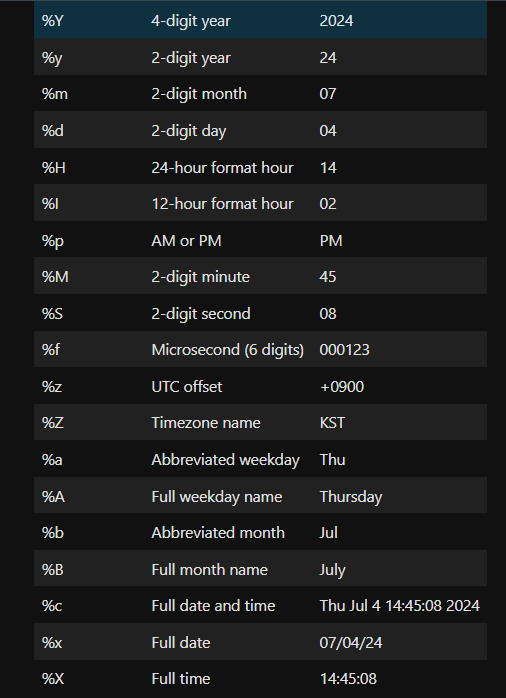

In [38]:
from langchain.output_parsers import DatetimeOutputParser
from langchain_core.prompts import PromptTemplate

# Initialize the output parser
output_parser = DatetimeOutputParser()

# Specify date format
date_format = "%Y-%m-%d"
output_parser.format = date_format #!way to set the format

# Get format instructions
format_instructions = output_parser.get_format_instructions()

# Create answer template for user questions
template = """Answer the users question:\n\n#Format Instructions: \n{format_instructions}\n\n#Question: \n{question}\n\n#Answer:"""

# Create a prompt from the template
prompt = PromptTemplate.from_template(
    template,
    partial_variables={
        "format_instructions": format_instructions,
    },  # Use parser's format instructions
)

print(format_instructions)
print("-----------------------------------------------\n")
print(prompt)

Write a datetime string that matches the following pattern: '%Y-%m-%d'.

Examples: 1543-06-11, 0888-11-12, 1552-03-24

Return ONLY this string, no other words!
-----------------------------------------------

input_variables=['question'] input_types={} partial_variables={'format_instructions': "Write a datetime string that matches the following pattern: '%Y-%m-%d'.\n\nExamples: 1543-06-11, 0888-11-12, 1552-03-24\n\nReturn ONLY this string, no other words!"} template='Answer the users question:\n\n#Format Instructions: \n{format_instructions}\n\n#Question: \n{question}\n\n#Answer:'


In [39]:
chain = prompt | LLM | output_parser

# Call the chain to get an answer to the question
output = chain.invoke({"question": "The year Google was founded"})

print(output)
print(type(output))

1998-09-04 00:00:00
<class 'datetime.datetime'>


## EnumOutputParser
    parses the output of a language model into one of the predefined enumeration (Enum) values , offering the following features:

    Enumeration Parsing: Converts the string output into a predefined Enum value.
    Type Safety: Ensures that the parsed result is always one of the defined Enum values.
    Flexibility: Automatically handles spaces and line breaks.

In [61]:
from langchain.output_parsers.enum import EnumOutputParser
from enum import Enum

class Colors(Enum):
    RED = "Red"
    BLUE = "Blue"
    BROWN = "Brown"


parser = EnumOutputParser(enum = Colors)    

In [67]:
prompt = (
    PromptTemplate.from_template(
        """Answe in one word, Which color is this object?

Object: {object}

Instructions: {instructions}"""
    ).partial(instructions=parser.get_format_instructions())
)


# Entire chain: (prompt) -> (LLM) -> (Enum Parser)
chain = prompt | LLM | parser

In [68]:
response = chain.invoke({"object": "Blue Sky"})
print("Parsed Enum:", response)
print("Raw Enum Value:", response.value)

Parsed Enum: Colors.BLUE
Raw Enum Value: Blue


## OutputFixingParser
     LangChain provides an automated mechanism for correcting errors that may occur during the output parsing process. This parser is designed to wrap around another parser, such as the PydanticOutputParser, and intervenes when the underlying parser encounters outputs that are malformed or do not conform to the expected format. It achieves this by leveraging additional LLM calls to fix the errors and ensure proper formatting.
     The OutputFixingParser steps in as follows:
     ******************************************
    Error Detection : It recognizes that the output does not meet the schema requirements.
    Error Correction : It generates a follow-up request to the LLM with explicit instructions to address the issues.
    Reformatted Output with Specific Instructions : The OutputFixingParser ensures that the correction instructions precisely identify the errors, such as missing fields or incorrect data types. The instructions guide the LLM to reformat the output to meet the schema requirements accurately.

In [69]:
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field
from typing import List


# Define the Actor class using Pydantic
class Actor(BaseModel):
    name: str = Field(description="name of an actor")
    film_names: List[str] = Field(description="list of names of films they starred in")


# A query to generate the filmography for a random actor
actor_query = "Generate the filmography for a random actor."

# Use PydanticOutputParser to parse the output into an Actor object
parser = PydanticOutputParser(pydantic_object=Actor)

In [71]:
misformatted = "{'name': 'Tom Hanks', 'film_names': ['Forrest Gump']}"
parser.parse(misformatted)

OutputParserException: Invalid json output: {'name': 'Tom Hanks', 'film_names': ['Forrest Gump']}
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [80]:
from langchain_core.prompts import PromptTemplate
from langchain.output_parsers import OutputFixingParser

# Define a custom prompt to provide the fixing instructions
fixing_prompt = PromptTemplate(
    template=(
        "The following JSON is incorrectly formatted or incomplete: {completion}\n"
    ),
    input_variables=[
        "completion",
    ],
)

# Use OutputFixingParser to automatically fix the error
new_parser = OutputFixingParser.from_llm(
    parser=parser, llm=LLM, prompt=fixing_prompt
)

In [81]:
misformatted

"{'name': 'Tom Hanks', 'film_names': ['Forrest Gump']}"

In [82]:
#Attempt to parse the misformatted JSON with Exception Handling
try:
    actor = new_parser.parse(misformatted)
    print("Parsed actor:", actor)
except Exception as e:
    print("Error while parsing:", e)

Error while parsing: Invalid json output: The provided JSON is correctly formatted and complete. It is a dictionary with two keys: "name" and "film\_names". The value associated with "name" is the string 'Tom Hanks', and the value associated with "film\_names" is a list containing the string 'Forrest Gump'.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 
